<a href="https://colab.research.google.com/github/lfilipeAndrade/Data-Manipulation/blob/main/Analise_Exploratoria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas - DataFrames

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

## Análise Exploratória de Dados

In [5]:
df = pd.read_csv('dataframe_saved_v1.csv')

In [6]:
df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [7]:
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [9]:
df = pd.read_csv('dataframe_saved_v1.csv', parse_dates = ['Data'])

In [10]:
df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [11]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [12]:
cols = ['Data', 'Distancia', 'Tempo']
df.columns = cols
df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [13]:
df.rename(columns = {df.columns[0]:'Data'}, inplace = True)

In [41]:
# Retornar a qtd de registros em um mês especifico
len(df['2015-08'])

29

In [15]:
# Definir a cpluna data como indice
df.set_index('Data', inplace = True)

In [16]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


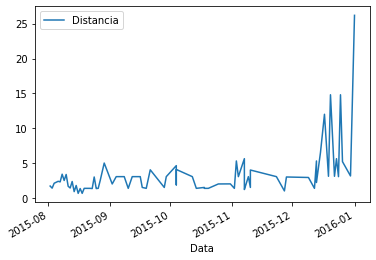

In [17]:
df.plot()

In [19]:
# Função que converte horas em formato "01:00" (string) em seg. (numerico), quebrado pelo caract ":"
tempo_idx_0 = df.Tempo[0]
def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan 
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    
print(calcula_total_segundos(tempo_idx_0))

nan


In [20]:
df['Segundos'] = df.Tempo.map(calcula_total_segundos)

In [21]:
df.head(10)

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [24]:
df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [32]:
# fillna(0) tem a função de substituir valores NA por outro, nesse caso por zero
df.fillna(0).describe()

,Distancia,Segundos
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [33]:
# Criando uma nova coluna, convertendo os valores da coluna "segundos" com a função map para iterar todas as linhas
df['Minutos'] = df['Segundos'].map(lambda x: x / 60)

In [34]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


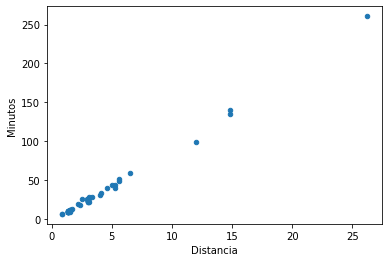

In [35]:
df.plot(x = 'Distancia', y = 'Minutos', kind = 'scatter')

In [36]:
# Analizando a correlação das variáveis 
df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [37]:
df.corr(method = 'spearman')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.96482,0.96482
Segundos,0.96482,1.00000,1.00000
Minutos,0.96482,1.00000,1.00000


In [38]:
df.corr(method = 'kendall')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.88305,0.88305
Segundos,0.88305,1.00000,1.00000
Minutos,0.88305,1.00000,1.00000


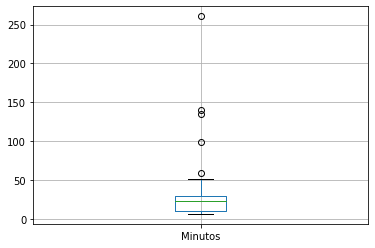

In [39]:
df.boxplot('Minutos', return_type = 'axes')

In [42]:
df['Min_Por_Km'] = df['Minutos'] / df['Distancia']

In [44]:
df.head

<bound method NDFrame.head of             Distancia    Tempo  Segundos     Minutos  Min_Por_Km
Data                                                            
2015-08-02       1.70      NaN       NaN         NaN         NaN
2015-08-03       1.40      NaN       NaN         NaN         NaN
2015-08-04       2.10      NaN       NaN         NaN         NaN
2015-08-06       2.38      NaN       NaN         NaN         NaN
2015-08-07       2.30      NaN       NaN         NaN         NaN
...               ...      ...       ...         ...         ...
2015-12-24       3.05  0:25:08    1508.0   25.133333    8.240437
2015-12-25      14.80  2:20:00    8400.0  140.000000    9.459459
2015-12-26       5.20      NaN       NaN         NaN         NaN
2015-12-30       3.15  0:22:10    1330.0   22.166667    7.037037
2016-01-01      26.20  4:20:43   15643.0  260.716667    9.951018

[81 rows x 5 columns]>

Text(0, 0.5, 'Minutos / Km')

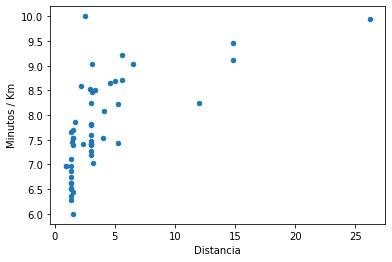

In [45]:
df.plot(x = 'Distancia', y = 'Min_Por_Km', kind = 'scatter')
plt.ylabel("Minutos / Km")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4030fe6cd0>]],
      dtype=object)

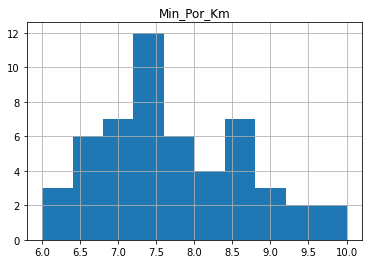

In [46]:
df.hist('Min_Por_Km')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8d3ef0>]], dtype=object)

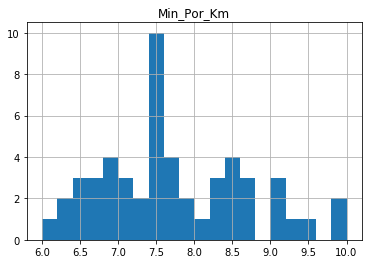

In [ ]:
df.hist('Min_Por_Km', bins = 20)

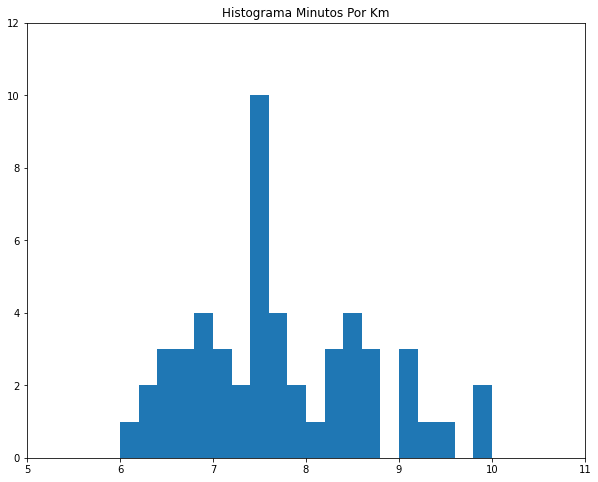

In [47]:
df.hist('Min_Por_Km', bins = 20, figsize = (10, 8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Histograma Minutos Por Km")
plt.grid(False)
plt.savefig('hist_minutos_por_km.png')

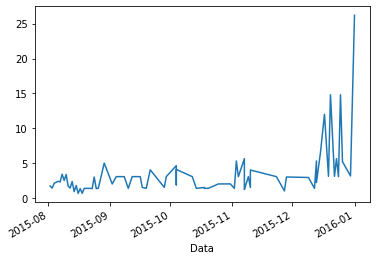

In [48]:
df['Distancia'].plot()

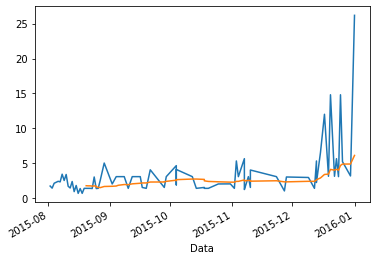

In [54]:
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window=20).mean().plot() # Criando uma média móvel de 20 períodos

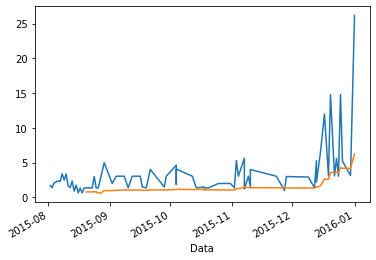

In [56]:
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window=20).std().plot() # Desvio padrão 

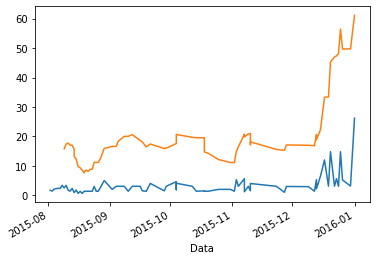

In [65]:
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window=7).sum().plot()

In [66]:
df.index

DatetimeIndex(['2015-08-02', '2015-08-03', '2015-08-04', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17',
               '2015-08-18', '2015-08-19', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-29', '2015-09-02', '2015-09-04', '2015-09-05',
               '2015-09-08', '2015-09-10', '2015-09-12', '2015-09-16',
               '2015-09-17', '2015-09-19', '2015-09-21', '2015-09-28',
               '2015-09-28', '2015-09-29', '2015-10-04', '2015-10-04',
               '2015-10-04', '2015-10-12', '2015-10-14', '2015-10-18',
               '2015-10-18', '2015-10-18', '2015-10-20', '2015-10-25',
               '2015-10-31', '2015-11-02', '2015-11-03', '2015-11-04',
      

In [68]:
# Definindo o intervalo dos dados (usando o indice Data)
df['2015-11-20':'2015-12']

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-11-23,3.05,0:22:35,1355.0,22.583333,7.404372
2015-11-27,1.00,NaN,NaN,NaN,NaN
2015-11-28,3.00,NaN,NaN,NaN,NaN
2015-12-09,2.93,0:25:00,1500.0,25.000000,8.532423
2015-12-12,1.37,0:09:15,555.0,9.250000,6.751825
2015-12-13,5.30,0:43:36,2616.0,43.600000,8.226415
2015-12-13,2.21,0:18:59,1139.0,18.983333,8.589744
2015-12-15,6.50,0:58:43,3523.0,58.716667,9.033333
2015-12-17,12.00,1:39:00,5940.0,99.000000,8.250000


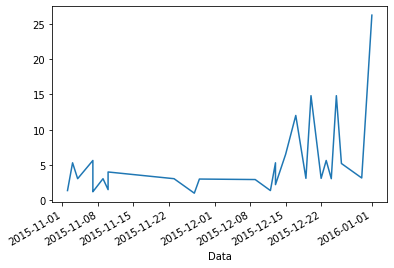

In [69]:
df['2015-11':'2016-1-1']['Distancia'].plot()

In [83]:
# Filtrando o df por condição de determinada coluna
df[df['Minutos'] > 30]

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-08-29,5.00,0:43:27,2607.0,43.450000,8.690000
2015-09-21,4.03,0:30:22,1822.0,30.366667,7.535153
2015-10-04,4.63,0:40:00,2400.0,40.000000,8.639309
2015-10-04,4.08,0:33:00,1980.0,33.000000,8.088235
2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2015-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2015-12-13,5.30,0:43:36,2616.0,43.600000,8.226415
2015-12-15,6.50,0:58:43,3523.0,58.716667,9.033333
2015-12-17,12.00,1:39:00,5940.0,99.000000,8.250000


In [86]:
# Buscando um dia pelo índice e retornando suas variáveis em um serie pandas
dia = df.loc['2015-8-12']